In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
dataset = pd.read_csv('cancer.csv')
x = dataset.drop(columns=["diagnosis(1=m, 0=b)"])
y = dataset["diagnosis(1=m, 0=b)"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [5]:
print("x_train shape:", x_train.shape)


x_train shape: (455, 30)


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=(x_train.shape[1],), activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6434 - loss: 0.6508
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8469 - loss: 0.4648 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8561 - loss: 0.3674 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8654 - loss: 0.3587 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9103 - loss: 0.2491
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9261 - loss: 0.2186 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9217 - loss: 0.2401 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9165 - loss: 0.2163 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9214 - loss: 0.2162 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9191 - loss: 0.2143 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8911 - loss: 0.2974 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

In [9]:
model.evaluate(x_test, y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9431 - loss: 0.1434  


[0.14220869541168213, 0.9385964870452881]

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [11]:
dataset = pd.read_csv('cancer.csv')


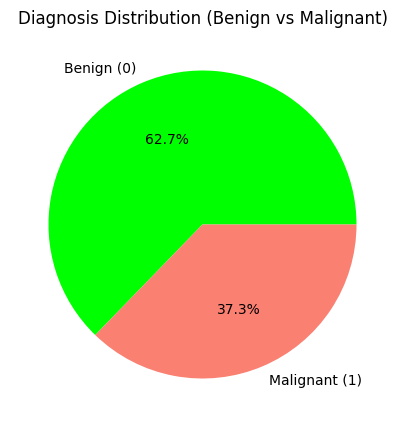

In [12]:
diagnosis_counts = dataset["diagnosis(1=m, 0=b)"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(diagnosis_counts, labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', colors=['lime', 'salmon'])
plt.title('Diagnosis Distribution (Benign vs Malignant)')
plt.show()

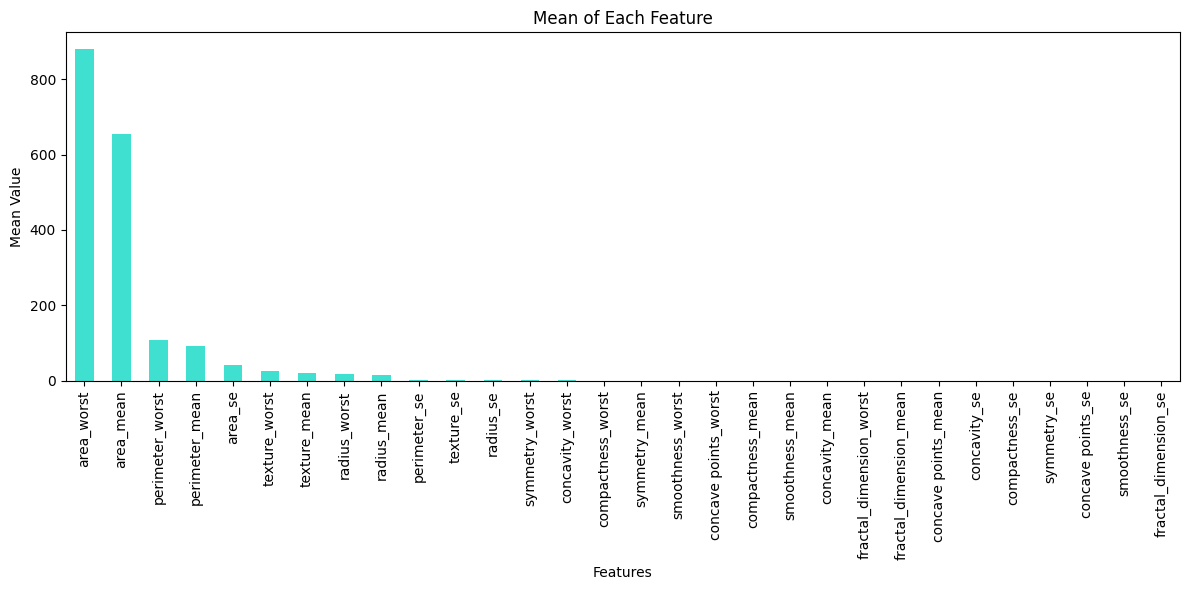

In [ ]:
plt.figure(figsize=(12, 6))
x.mean().sort_values(ascending=False).plot(kind='bar', color='turquoise')
plt.title('Mean of Each Feature')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

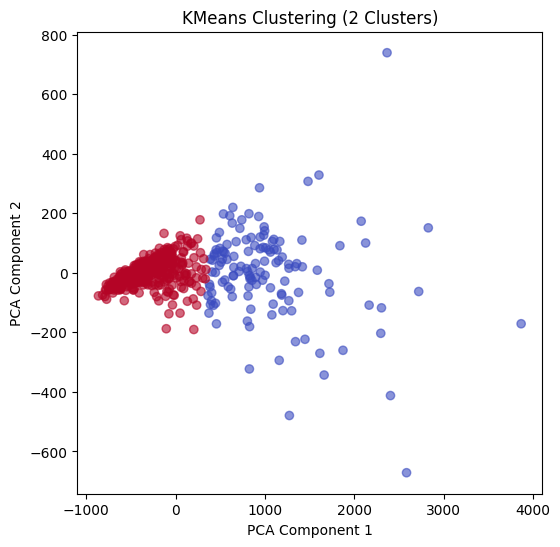

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(x)

plt.figure(figsize=(6, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.title('KMeans Clustering (2 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

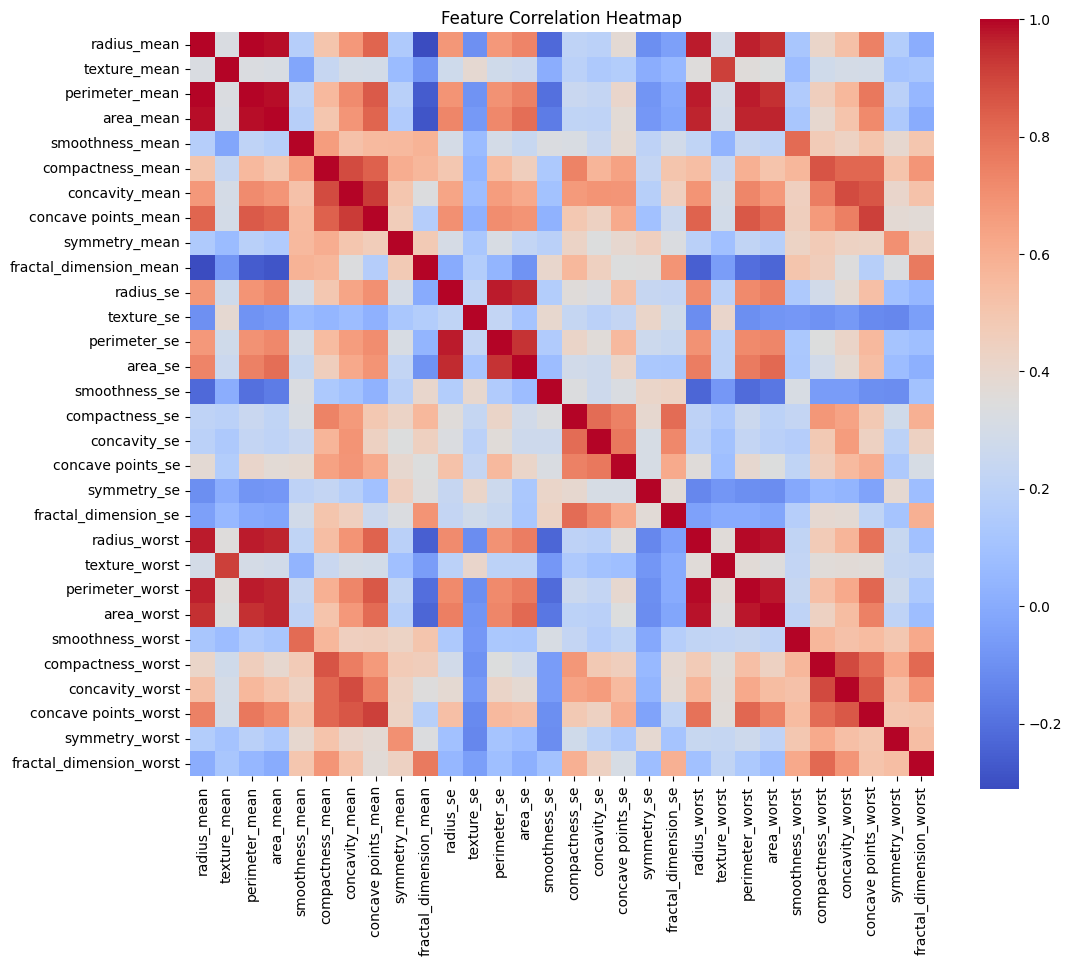

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = x.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


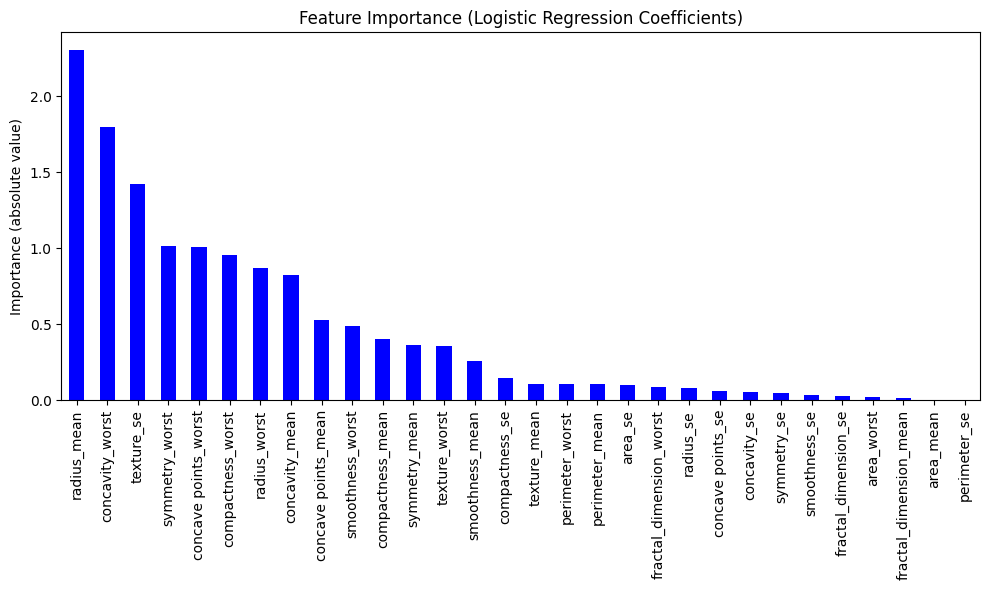

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x, y)
feature_importance = pd.Series(lr.coef_[0], index=x.columns)
plt.figure(figsize=(10, 6))
feature_importance.abs().sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.ylabel('Importance (absolute value)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

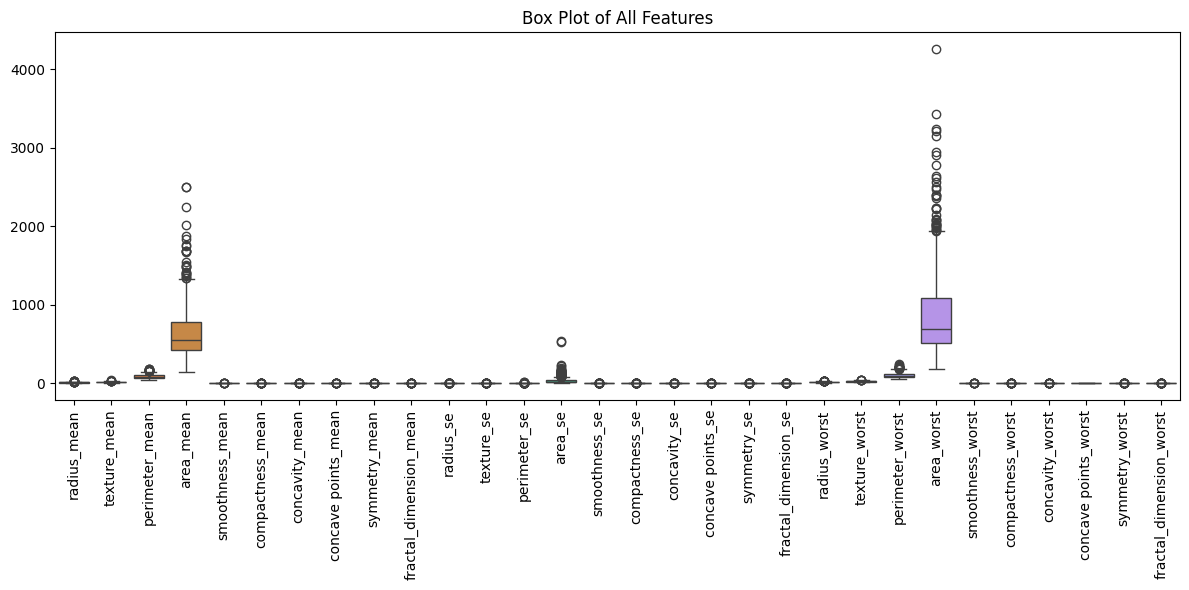

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=x)
plt.xticks(rotation=90)
plt.title('Box Plot of All Features')
plt.tight_layout()
plt.show()

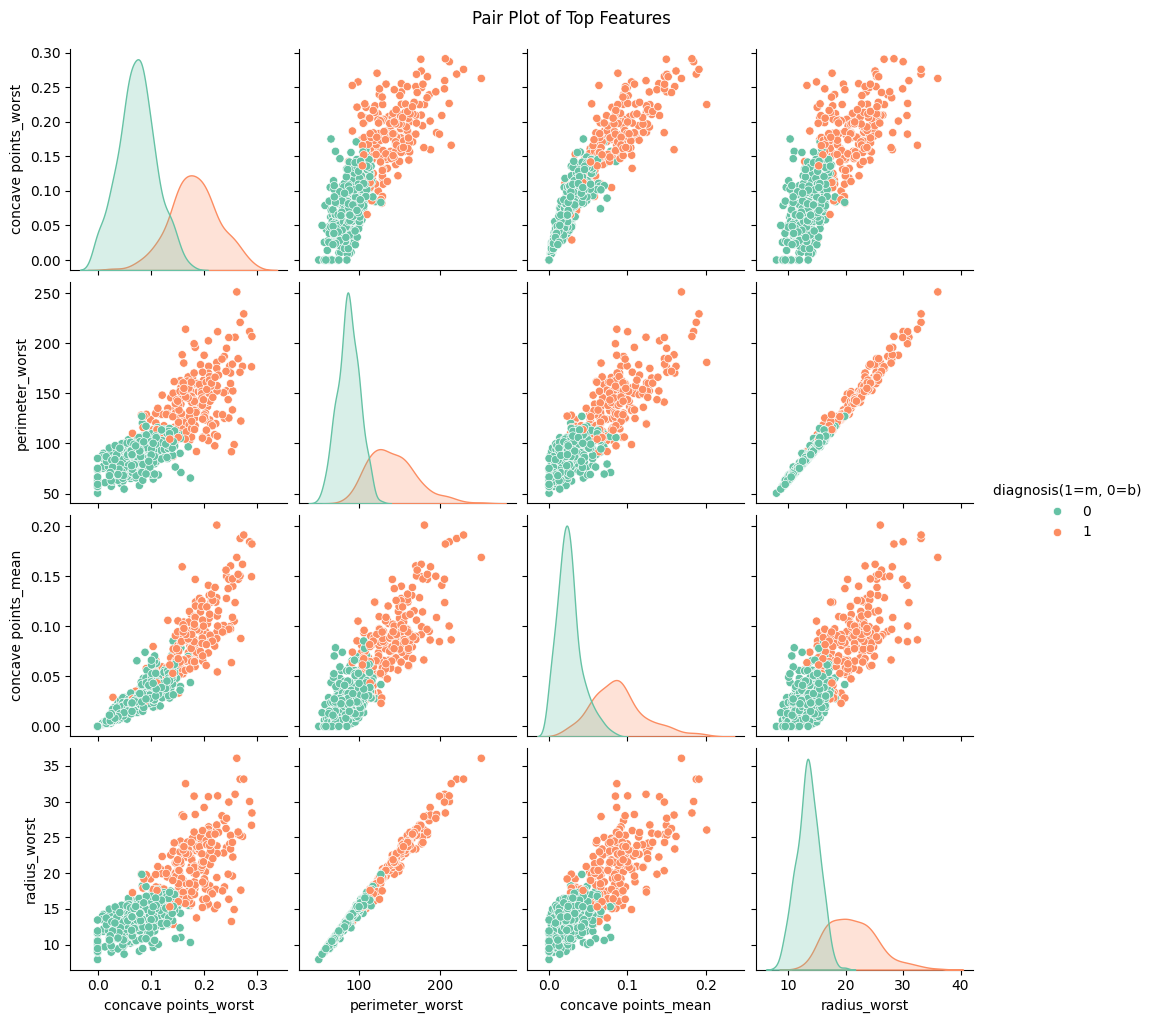

In [ ]:
top_features = dataset.corr()["diagnosis(1=m, 0=b)"].abs().sort_values(ascending=False)[1:5].index.tolist()

sns.pairplot(dataset[top_features + ["diagnosis(1=m, 0=b)"]], hue="diagnosis(1=m, 0=b)", palette="Set2")
plt.suptitle("Pair Plot of Top Features", y=1.02)
plt.show()

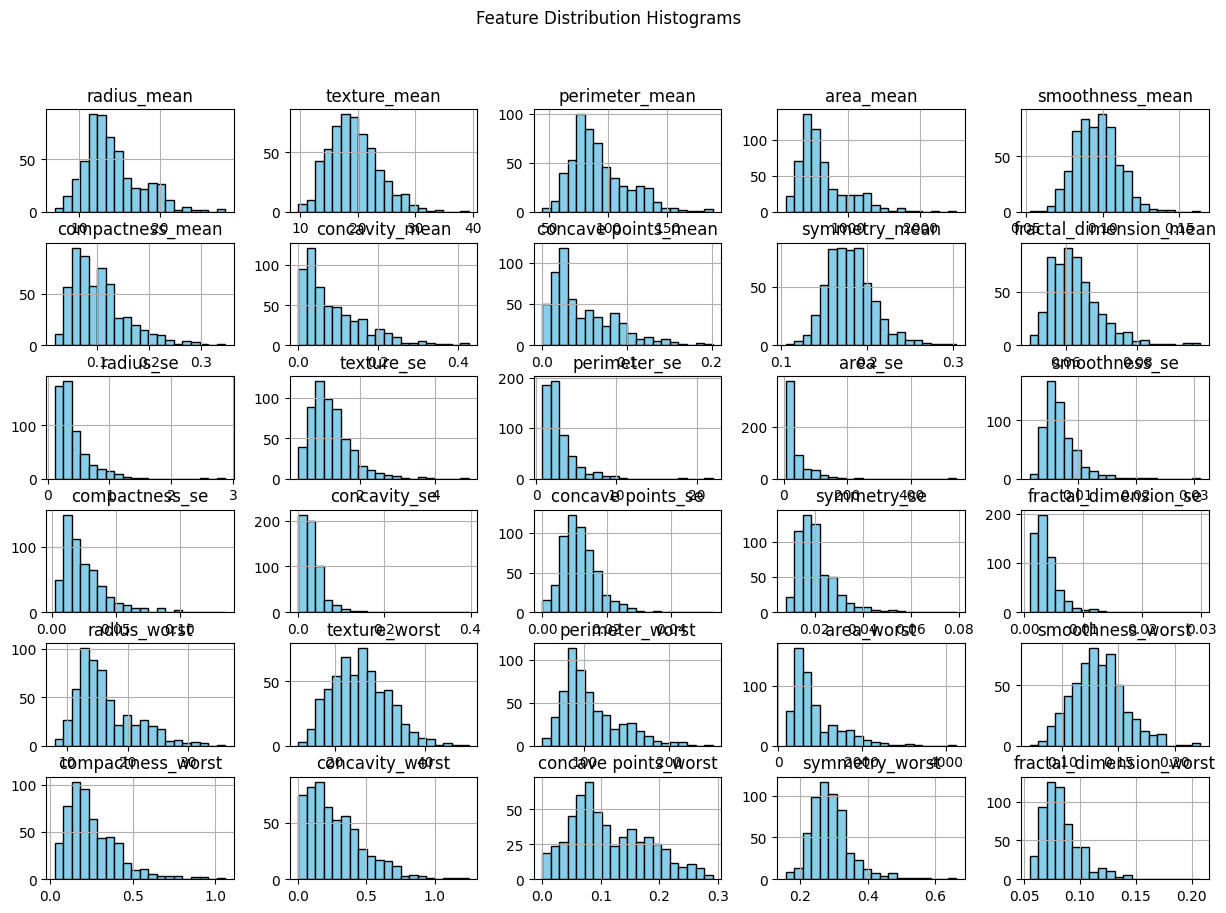

In [ ]:
x.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distribution Histograms")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_full = PCA().fit(x)

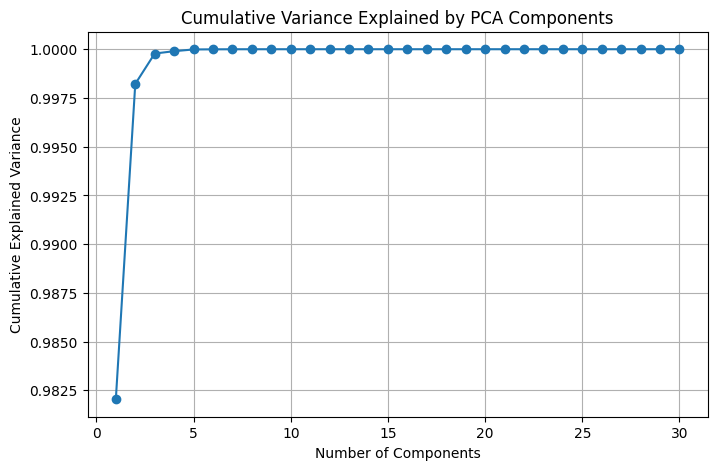

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

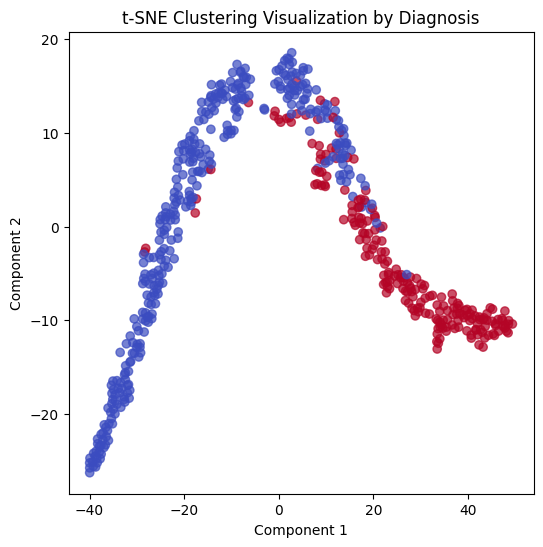

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize=(6,6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('t-SNE Clustering Visualization by Diagnosis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()